In [268]:
# Imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

# Set some styling rules
%matplotlib inline
plt.style.use('ggplot')

class kmeans:
    def __init__(self, minimum = 0, maximum = 100, dimensions = 2, pointNum = 50, clusterNum = 5):
        
        self.is3D = True if dimensions == 3 else False
        
        #Params passed to the constructor
        self.min = minimum
        self.max = maximum
        self.dim = dimensions
        self.clusterNum = clusterNum
        
        #Some class props
        self.iterations = 0
        self.lastCentroids = None
        
        #The family each point belongs to
        self.family = np.zeros(pointNum)
        
        #Make random points (ints) in  tuples based on dimensions and number of points specified to the constructor
        self.points = np.random.randint(maximum, size=(pointNum, dimensions))
        
        #Make random Clusters centers
        self.clusters = np.random.randint(maximum, size=(clusterNum, dimensions))
        
        #Set the labels and the cluster centers
        for i, pointCoords in enumerate(self.points):
            dist = np.linalg.norm(self.points[i]-self.clusters[0])
            for j, clusterCoords in enumerate(self.clusters):
                if(dist > np.linalg.norm(self.points[i]-self.clusters[j])):
                    self.family[i] = j
                    
        self.__draw__()
    
    
    def calculateCentroids(self):
        #Match the current state to the last state
        self.lastCentroids = np.copy(self.clusters)
        
        #Increment the iterations counter
        self.iterations += 1
        
         #Calculate new center
        for i, pointCoords in enumerate(self.points):
            dist = np.linalg.norm(self.points[i]-self.clusters[0])
            for j, clusterCoords in enumerate(self.clusters):
                if(dist > np.linalg.norm(self.points[i]-self.clusters[j])):
                    self.family[i] = j
                      
    def center(self):
        #Move the cluster centers to the new position
        centers = np.zeros(self.clusters.shape)
        #Get the new position and save it
        for i, point in enumerate(self.points):
            centers[int(self.family[i])] = centers[int(self.family[i])] + self.points[i] 
        
        #Move the cluster center to the new position
        for i, cluster in enumerate(self.clusters):
            self.clusters[i] = centers[i] / self.clusterNum
            
        self.__draw__()
    
    def hasChanged(self):
        return self.last_centroids == self.clusters
    

    def __draw__(self):
        #Create a plot figure so we can easily switch between 2D and 3D
        fig = plt.figure()
        
        if self.is3D:
            
            #Add a 3D plot
            ax = fig.add_subplot(111, projection='3d') 
            
            #Prints all the points generated
            for pointCoords in self.points:
                #Coords[0] = x, Coords[1] = y (If 3 dimensions specified Coords[2] will be Z)
                ax.scatter(pointCoords[0], pointCoords[1], pointCoords[2], color='red', s=10)

            #Prints all the clusters generated
            for clusterCoords in self.clusters:
                ax.scatter(clusterCoords[0], clusterCoords[1], clusterCoords[2], color='blue', s=20)
        #It's a 2D plot
        else:
            
            #Prints all the points generated
            for pointCoords in self.points:
                #Coords[0] = x, Coords[1] = y (If 3 dimensions specified Coords[2] will be Z)
                plt.scatter(pointCoords[0], pointCoords[1], color='red', s=10)

            #Prints all the clusters generated
            for clusterCoords in self.clusters:
                plt.scatter(clusterCoords[0], clusterCoords[1], color='blue', s=20)

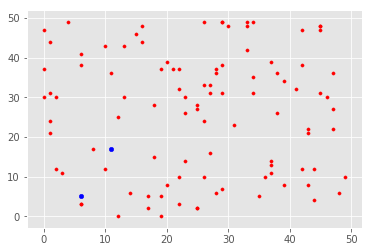

In [266]:
km = kmeans(0, 50, 2, 100, 2)
km.calculateCentroids()

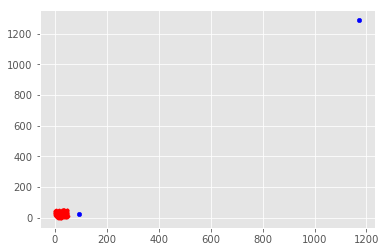

In [267]:
km.center()
km.__draw__()